# Analyzing Sound Files in Python with pyAudioAnalysis

In this notebook, we will utilize the pyAudioAnalysis library to work with .wav files. I retype imports to emphasize which files are needed. For a more detailed guide go [here](https://github.com/tyiannak/pyAudioAnalysis/wiki)

### Feature Extraction

The following code uses the methods in audioBasicIO.py to read a .wav file and to transform it to a mono signal. It also utilizes one method in ShortTermFeatures.py to extract various features of the sound file. The details of those features can be found [here](https://github.com/tyiannak/pyAudioAnalysis/wiki/3.-Feature-Extraction#general). Those data are then all graphed.

In [1]:
from pyAudioAnalysis import ShortTermFeatures as STF
from pyAudioAnalysis import audioBasicIO as ABIO
import matplotlib.pyplot as plt

Sampling rate: 44100
Stereo data: [[  80   80]
 [  72   72]
 [  56   56]
 ...
 [3712 3712]
 [3288 3288]
 [1564 1564]]
Mono data: [  80.   72.   56. ... 3712. 3288. 1564.]
Extracted data: [[ 9.16515426e-02  1.30671506e-01  1.33393829e-01 ...  1.72413793e-01
   1.72413793e-01  1.49274047e-01]
 [ 1.45159260e-02  1.39602781e-02  1.09408227e-02 ...  1.67728922e-02
   1.47650118e-02  1.62184883e-02]
 [ 2.89683381e+00  3.27252807e+00  3.26084035e+00 ...  3.29094386e+00
   3.27616550e+00  3.28217182e+00]
 ...
 [ 0.00000000e+00  2.01195208e-03 -9.04871296e-03 ... -1.56452744e-03
  -1.42111636e-03  1.84814108e-03]
 [ 0.00000000e+00 -4.29401176e-03 -9.92041622e-05 ... -3.53695686e-04
   1.64799310e-03 -1.22081710e-03]
 [ 0.00000000e+00  6.69848476e-04  8.18607245e-04 ... -1.03826461e-03
   9.75998969e-06  2.29746716e-03]]
Types of extracted data: ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2',

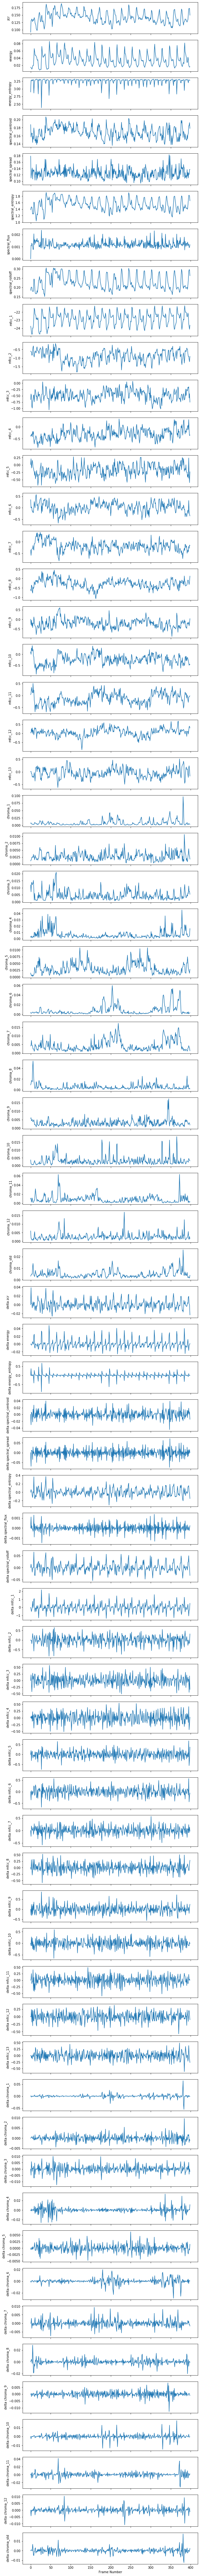

In [2]:
samplerate, data = ABIO.read_audio_file("sample.wav") # reads an audio file
print("Sampling rate:", samplerate)
print("Stereo data:", data)
data = ABIO.stereo_to_mono(data) # transforms stereo input to mono, necessary for feature_extraction()
print("Mono data:", data)


# extracts data from multiple features of the audio
# uses a frame size of 50msecs and a frame step of 25msecs, but the values must be in samples
# change deltas value to exlude that information
short_features, short_names = STF.feature_extraction(data, samplerate, 0.050*samplerate, 0.025*samplerate, deltas=True)              
                                                                
print("Extracted data:", short_features)
print("Types of extracted data:", short_names)

length = len(short_names) # number of features
figure, axs = plt.subplots(length, sharex=True, figsize=(10, 150))
plt.xlabel("Frame Number")

x = 0
for feature in short_features:
    axs[x].plot(feature[:])
    axs[x].set_ylabel(short_names[x])
    x += 1
        
plt.show()

The following code uses two methods from MidTermFeatures.py:
1. mid_feature_extraction(): computes the mean and standard deviation of the features calculated by feature_extraction() (it also returns these features) on the basis of frames too
2. beat_extraction(): uses the features from feature_extraction() to estimate the beats per minute and confidence level
* Note: the MidTermFeatures.py file has methods to do the bottom section for multiple files in a directory and for multiple directories

In [3]:
from pyAudioAnalysis import audioBasicIO as ABIO
from pyAudioAnalysis import MidTermFeatures as MTF
import matplotlib.pyplot as plt
import numpy as np

Statistics: [[7.55386477e-02 7.28512262e-02 6.17641584e-02 ... 2.58271674e-03
  0.00000000e+00 0.00000000e+00]
 [2.31105786e-03 1.69078274e-02 1.18646101e-02 ... 4.75970604e-04
  6.08225148e-05 6.08225148e-05]
 [3.09440384e+00 3.19871433e+00 3.18565582e+00 ... 2.83827858e+00
  3.31766308e+00 3.31766308e+00]
 ...
 [1.51791590e-02 2.14965617e-02 2.22871345e-02 ... 4.60082842e-03
  2.59714810e-09 0.00000000e+00]
 [3.45538589e-03 3.39514723e-03 5.55136986e-03 ... 6.29389226e-05
  3.20838103e-10 0.00000000e+00]
 [1.01887954e-02 7.32240154e-03 6.85204213e-03 ... 1.86075277e-02
  3.15014893e-09 0.00000000e+00]]
Statistic type: ['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 

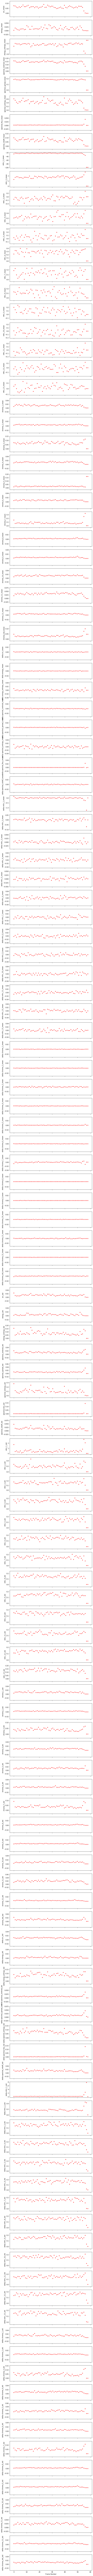

In [4]:
samplerate, data = ABIO.read_audio_file("waves.wav")
data = ABIO.stereo_to_mono(data) # again, transforms stereo signal to a mono signal and is necessary

# the third and fourth parameters are the frame size and frame step (in samples) respectively
# the last two parameters are the same but for feature_extraction() (also in samples, but 
#   here frame window is 50msecs and step window is 25msecs)
mid_features, short_features, mid_feature_names = MTF.mid_feature_extraction(data, samplerate, 
                                                                             1*samplerate, 1*samplerate, 
                                                                             0.05*samplerate, 0.025*samplerate)

print("Statistics:", mid_features)
print("Statistic type:", mid_feature_names)

length = len(mid_feature_names) # number of statistics on features
figure, axs = plt.subplots(length, sharex=True, figsize=(10, 320))
plt.xlabel("Frame Number")

num_frames = np.size(mid_features, 1) # number of frames
xaxis = np.linspace(0, round(num_frames), num_frames)

x = 0
for statistic in mid_features:
    axs[x].scatter(xaxis[:], statistic[:], c='r', marker='+')
    axs[x].set_ylabel(mid_feature_names[x])
    x += 1
        
plt.show()


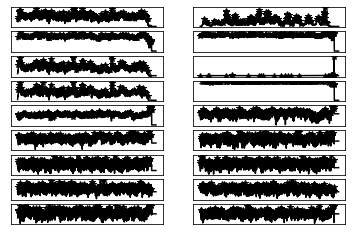

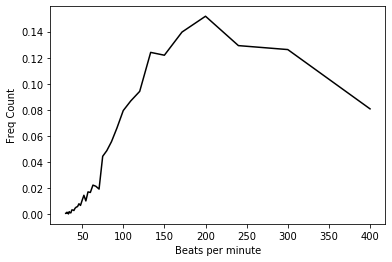

BPM: 199.99999999999997
Confidence level: 0.09752709023178614


In [5]:
# the second parameter is the window size in seconds; use the previous one used to calculate the features
# change plot to determine whether the data should be graphed
bpm, confidence = MTF.beat_extraction(short_features, .05, plot=True)
print("BPM:", bpm)
print("Confidence level:", confidence)

### Audio Visualization

The following code takes a directory path and computes the spectrogram and chromagram of every .wav file in it. Using `AudioFolder` from `waggle.data.audio`, the sampling rate and signal of every .wav in a directory is extracted. Then, the signal of those files is converted to a mono signal using `stereo_to_mono()` from `pyAudioAnalysis.audioBasicIO`. That signal and the sampling rate are used to create the visuals using `spectrogram()` and `chromagram()` from `pyAudioAnalysis.ShortTermFeatures`

In [6]:
from pyAudioAnalysis import audioBasicIO as ABIO
from pyAudioAnalysis import ShortTermFeatures as STF
from waggle.data.audio import AudioFolder

using backwards compatible implementation of time_ns


In [7]:
"""
helper function to locate the readable AudioSample files within a directory,
ignoring the hidden files that cause errors
"""
def readable_files(folder):
    length = len(folder)
    locs = []
    for x in range(length - 1):
        if not str(folder.files[x].stem).startswith('.'):
            locs.append(x)
            
    return locs

100%|██████████| 158/158 [00:00<00:00, 3113.24it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-0.wav


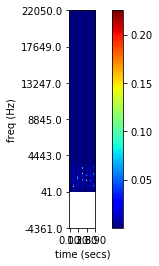

 11%|█▏        | 18/158 [00:00<00:00, 179.23it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-0.wav


100%|██████████| 158/158 [00:00<00:00, 176.04it/s]


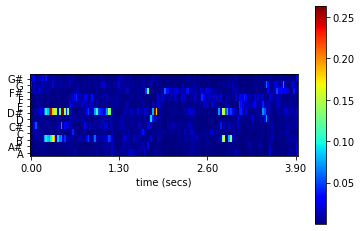

100%|██████████| 158/158 [00:00<00:00, 3254.86it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-1.wav


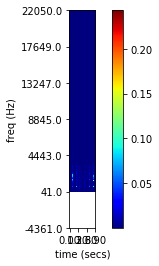

 12%|█▏        | 19/158 [00:00<00:00, 180.77it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-1.wav


100%|██████████| 158/158 [00:00<00:00, 174.79it/s]


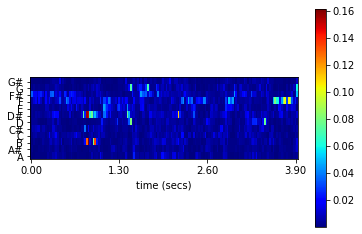

100%|██████████| 158/158 [00:00<00:00, 3216.46it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-2.wav


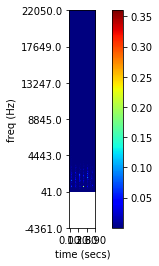

 11%|█▏        | 18/158 [00:00<00:00, 179.32it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-2.wav


100%|██████████| 158/158 [00:00<00:00, 175.67it/s]


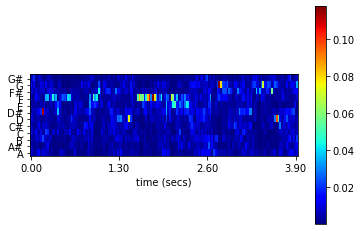

100%|██████████| 158/158 [00:00<00:00, 3358.01it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-3.wav


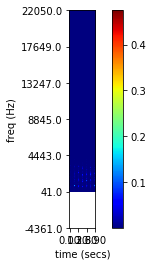

 12%|█▏        | 19/158 [00:00<00:00, 180.41it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/100652-3-0-3.wav


100%|██████████| 158/158 [00:00<00:00, 175.32it/s]


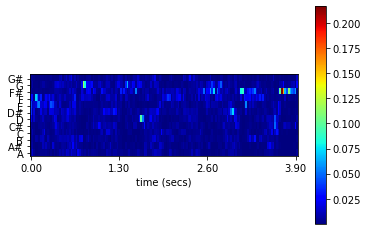

100%|██████████| 157/157 [00:00<00:00, 2727.75it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-2.wav


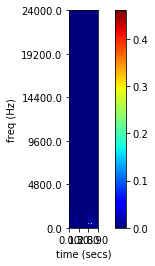

 11%|█▏        | 18/157 [00:00<00:00, 178.80it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-2.wav


100%|██████████| 157/157 [00:00<00:00, 172.79it/s]


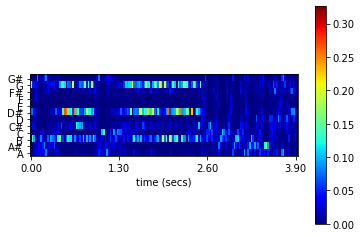

100%|██████████| 157/157 [00:00<00:00, 3346.54it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-3.wav


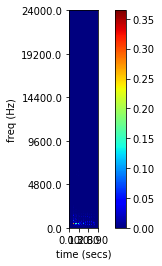

 11%|█▏        | 18/157 [00:00<00:00, 177.28it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-3.wav


100%|██████████| 157/157 [00:00<00:00, 167.56it/s]


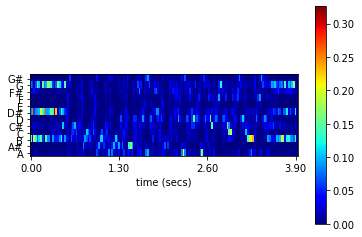

100%|██████████| 157/157 [00:00<00:00, 3214.21it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-8.wav


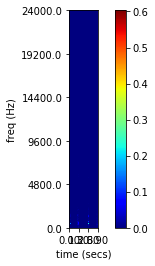

 11%|█▏        | 18/157 [00:00<00:00, 173.86it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/101415-3-0-8.wav


100%|██████████| 157/157 [00:00<00:00, 168.94it/s]


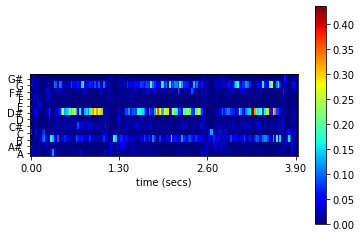

100%|██████████| 30/30 [00:00<00:00, 2527.40it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102104-3-0-0.wav


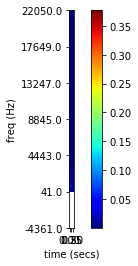

 53%|█████▎    | 16/30 [00:00<00:00, 151.21it/s]

(30, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102104-3-0-0.wav


100%|██████████| 30/30 [00:00<00:00, 145.27it/s]


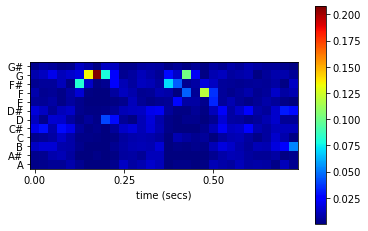

100%|██████████| 63/63 [00:00<00:00, 2257.33it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102106-3-0-0.wav


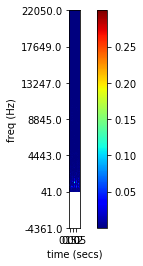

 27%|██▋       | 17/63 [00:00<00:00, 163.76it/s]

(63, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102106-3-0-0.wav


100%|██████████| 63/63 [00:00<00:00, 150.05it/s]


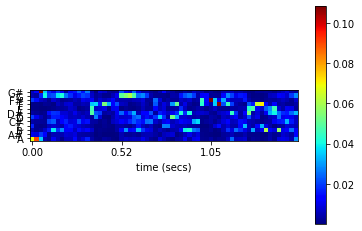

100%|██████████| 158/158 [00:00<00:00, 2193.74it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-0-1.wav


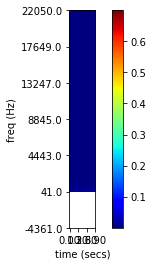

  8%|▊         | 12/158 [00:00<00:01, 112.75it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-0-1.wav


100%|██████████| 158/158 [00:01<00:00, 120.64it/s]


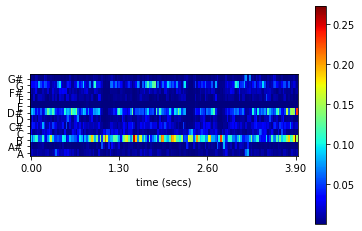

100%|██████████| 158/158 [00:00<00:00, 2165.96it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-0.wav


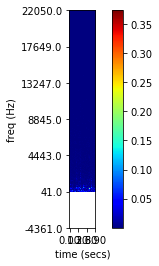

  9%|▉         | 15/158 [00:00<00:00, 145.17it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-0.wav


100%|██████████| 158/158 [00:01<00:00, 143.22it/s]


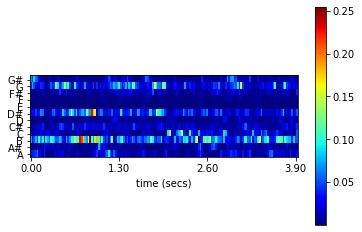

100%|██████████| 158/158 [00:00<00:00, 2210.81it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-5.wav


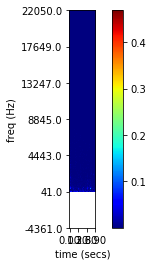

  8%|▊         | 13/158 [00:00<00:01, 122.63it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-5.wav


100%|██████████| 158/158 [00:01<00:00, 127.69it/s]


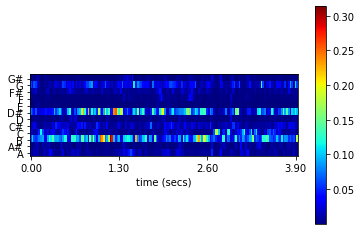

100%|██████████| 158/158 [00:00<00:00, 2519.67it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-6.wav


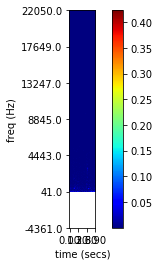

 11%|█▏        | 18/158 [00:00<00:00, 176.71it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/102842-3-1-6.wav


100%|██████████| 158/158 [00:01<00:00, 155.06it/s]


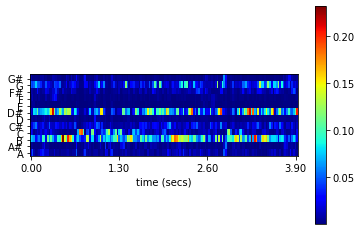

100%|██████████| 17/17 [00:00<00:00, 2361.74it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-2-0.wav


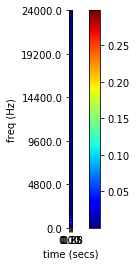

100%|██████████| 17/17 [00:00<00:00, 148.14it/s]

(17, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-2-0.wav


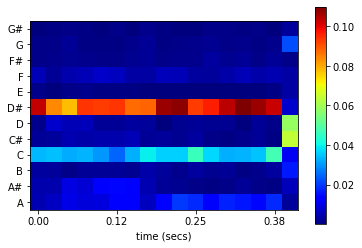

100%|██████████| 41/41 [00:00<00:00, 2666.73it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-3-0.wav


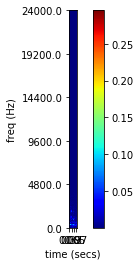

 39%|███▉      | 16/41 [00:00<00:00, 158.04it/s]

(41, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-3-0.wav


100%|██████████| 41/41 [00:00<00:00, 153.71it/s]


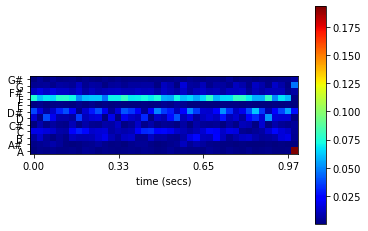

100%|██████████| 53/53 [00:00<00:00, 2702.45it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-4-0.wav


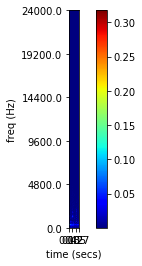

 30%|███       | 16/53 [00:00<00:00, 159.64it/s]

(53, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-4-0.wav


100%|██████████| 53/53 [00:00<00:00, 155.41it/s]


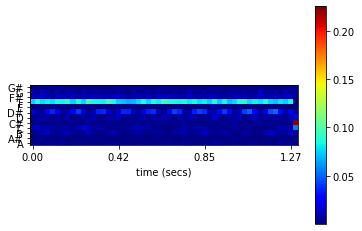

100%|██████████| 65/65 [00:00<00:00, 2624.06it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-6-0.wav


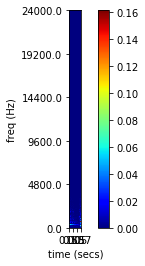

 26%|██▌       | 17/65 [00:00<00:00, 162.57it/s]

(66, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/108187-3-6-0.wav


100%|██████████| 65/65 [00:00<00:00, 158.79it/s]


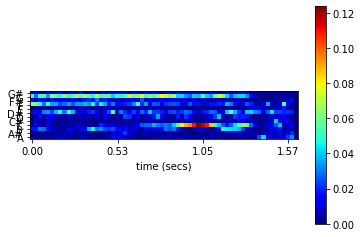

100%|██████████| 158/158 [00:00<00:00, 2744.25it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-38.wav


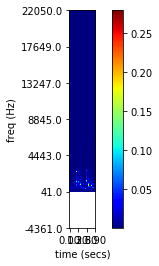

 11%|█         | 17/158 [00:00<00:00, 163.82it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-38.wav


100%|██████████| 158/158 [00:00<00:00, 162.65it/s]


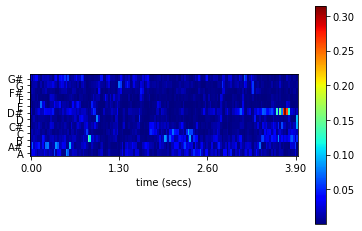

100%|██████████| 158/158 [00:00<00:00, 2800.16it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-48.wav


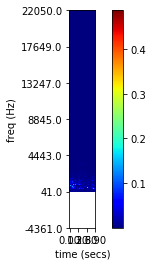

 11%|█         | 17/158 [00:00<00:00, 163.71it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-48.wav


100%|██████████| 158/158 [00:00<00:00, 163.55it/s]


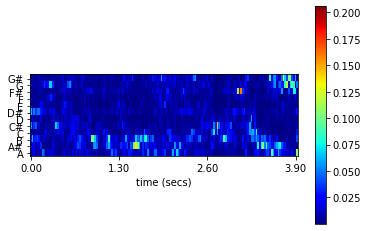

100%|██████████| 158/158 [00:00<00:00, 2895.32it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-57.wav


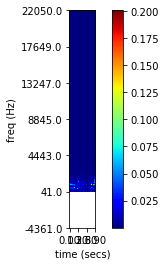

 11%|█         | 17/158 [00:00<00:00, 162.64it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-57.wav


100%|██████████| 158/158 [00:00<00:00, 163.21it/s]


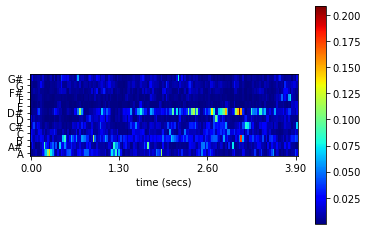

100%|██████████| 158/158 [00:00<00:00, 2880.97it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-80.wav


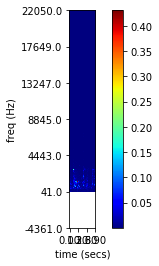

 11%|█         | 17/158 [00:00<00:00, 164.22it/s]

(158, 1102)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/112195-3-0-80.wav


100%|██████████| 158/158 [00:00<00:00, 163.97it/s]


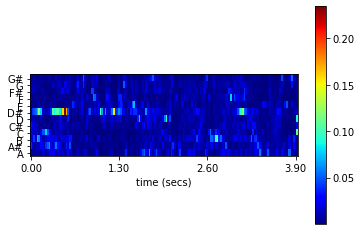

100%|██████████| 15/15 [00:00<00:00, 2183.17it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/113785-3-0-0.wav


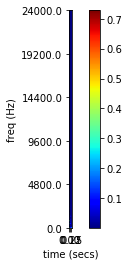

100%|██████████| 15/15 [00:00<00:00, 155.75it/s]

(15, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/113785-3-0-0.wav


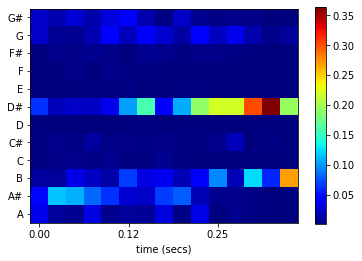

100%|██████████| 21/21 [00:00<00:00, 2161.43it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/113785-3-1-0.wav


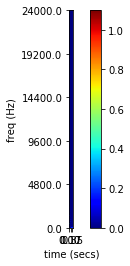

100%|██████████| 21/21 [00:00<00:00, 151.82it/s]

(22, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/113785-3-1-0.wav


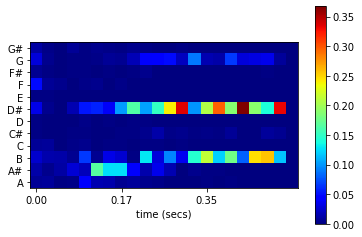

100%|██████████| 157/157 [00:00<00:00, 2842.33it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-2.wav


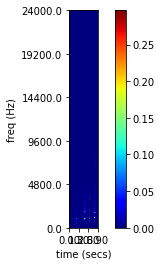

 11%|█         | 17/157 [00:00<00:00, 161.00it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-2.wav


100%|██████████| 157/157 [00:00<00:00, 159.35it/s]


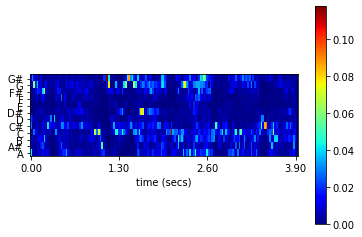

100%|██████████| 157/157 [00:00<00:00, 2767.84it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-4.wav


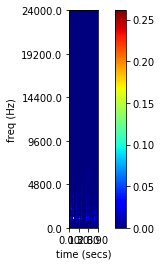

 10%|█         | 16/157 [00:00<00:00, 157.76it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-4.wav


100%|██████████| 157/157 [00:00<00:00, 160.35it/s]


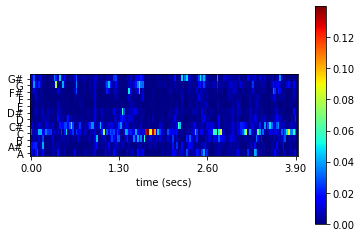

100%|██████████| 157/157 [00:00<00:00, 2769.41it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-5.wav


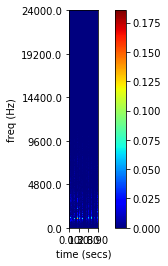

 10%|▉         | 15/157 [00:00<00:00, 149.03it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-5.wav


100%|██████████| 157/157 [00:01<00:00, 152.36it/s]


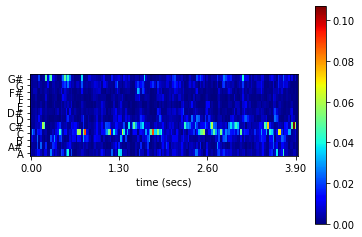

100%|██████████| 157/157 [00:00<00:00, 2752.17it/s]

Spectrogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-7.wav


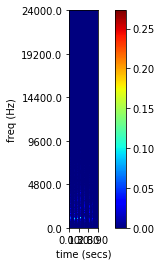

 10%|▉         | 15/157 [00:00<00:00, 148.97it/s]

(158, 1200)
Chromogram for /home/aldo/Sage/SageEdu/microphone/../projects/dog_sounds/114587-3-0-7.wav


100%|██████████| 157/157 [00:01<00:00, 134.09it/s]


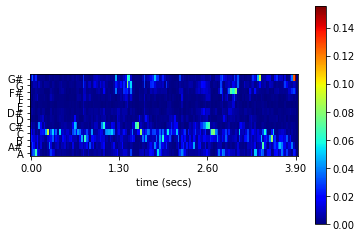

In [8]:
dogSoundsDir = "../projects/dog_sounds"

dataset = AudioFolder(dogSoundsDir) # extracting files
locs = readable_files(dataset) # computes readable files, ignoring hidden files

for x in locs:
    sample = dataset[x]
    data = sample.data
    data = ABIO.stereo_to_mono(sample.data) # signal conversion
    samplerate = sample.samplerate
    file = dataset.files[x]
    
    # visuals
    print("Spectrogram for", file)
    specgram, time_axis, freq_axis = STF.spectrogram(data, samplerate, 0.05*samplerate, 0.025*samplerate, True, True)
    
    print("Chromogram for", file)
    chromogram, time_axis_c, freq_axis_c = STF.chromagram(data, samplerate, 0.05*samplerate, 0.025*samplerate, True, True)